In [3]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display
from sklearn import preprocessing
import numpy as np
import IPython
from scipy.io.wavfile import read
import matplotlib.pyplot as plt


In [2]:
path_train = 'data/train_labels.csv'
path_test = 'data/test_files.csv'
df = pd.read_csv(path_train)
df['filename'] = df['filename'].map(lambda x: 'data/data/%04d.wav' % x)
le = preprocessing.LabelEncoder()
df['height'] = le.fit_transform(df['height'])
le = preprocessing.LabelEncoder()
df['pasture'] = le.fit_transform(df['pasture'])
print(len(df.index))
df.head(2)

1532


,filename,pasture,height,label
0,data/data/0004.wav,0,1,2
1,data/data/0009.wav,0,1,2


KeyboardInterrupt: 

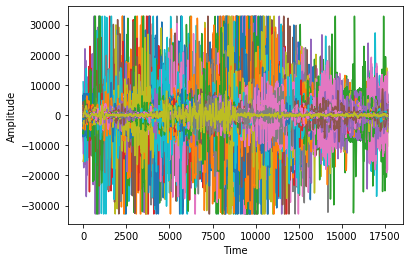

In [8]:
for k,v in df.iterrows():
    input_data = read(v.filename)
    audio = input_data[1]
    # plot the first 1024 samples
    plt.plot(audio)
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title
    # plt.title("Sample Wav")
    # display the plot
    plt.savefig("data/plots/" + v.filename.split("/")[-1] + ".png")


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)


In [ ]:
def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])


In [ ]:

for k,v in in df.iterrows:
    filename = v.filename.split("/")[-1] + ".png"
    filename_path = 'data/plots/' + filename
    X.append(get_features(filename_path))
    y.append(v.label)
